### Exercise 1a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from utils import MSE_and_R2, opt_theta, generate_dataset, runge

In [2]:
# Generate dataset
np.random.seed(124)
x, y = generate_dataset()

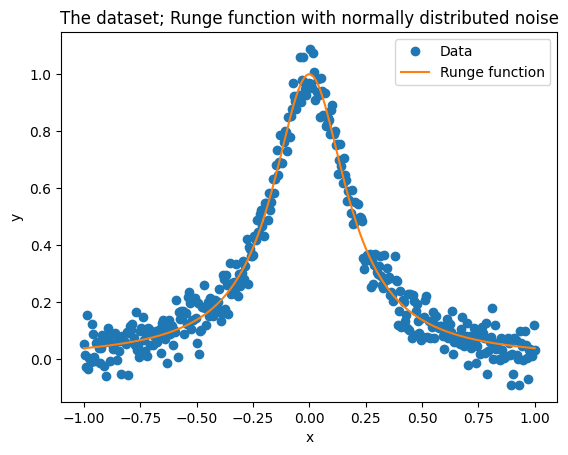

In [3]:
# Visalize the dataset

plt.plot(x,y,"o",label="Data")
plt.plot(x,runge(x),label="Runge function")
plt.title("The dataset; Runge function with normally distributed noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

0.8701110664960579


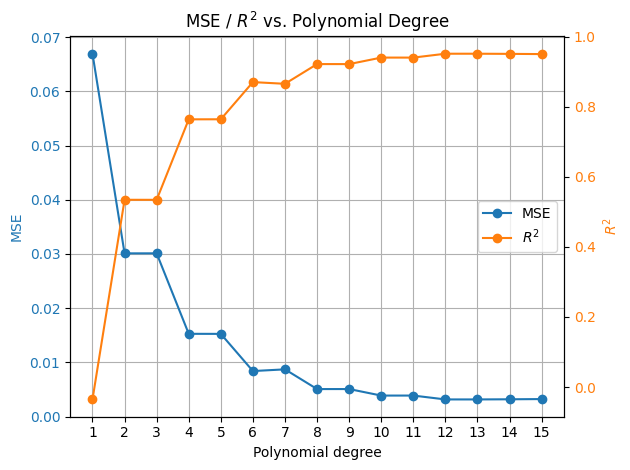

In [4]:
# Plot the MSE and R2 scores as a function of polynomial degrees

polynomial_degrees = np.array(range(1, 16))

mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees)

# Shared plot, different axis
fig, ax1 = plt.subplots()
ax1.set_xlabel('Polynomial degree')
ax1.set_title('MSE / $R^2$ vs. Polynomial Degree')
ax1.set_xticks(polynomial_degrees)
ax1.grid()

# MSE line
color1 = "C0"
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylabel('MSE', color=color1)
mse_line, = ax1.plot(polynomial_degrees, mse_values, marker='o', color=color1, label="MSE")

# R2 line
ax2 = ax1.twinx()
color2 = "C1"
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylabel('$R^2$', color=color2)
r2_line, = ax2.plot(polynomial_degrees, r2_values, marker='o', color=color2, label="$R^2$")

# Legend
lines = [mse_line, r2_line]
labels = [line.get_label() for line in lines]
ax2.legend(lines, labels, loc='center right')

print(r2_values[5])

plt.tight_layout()
plt.show()

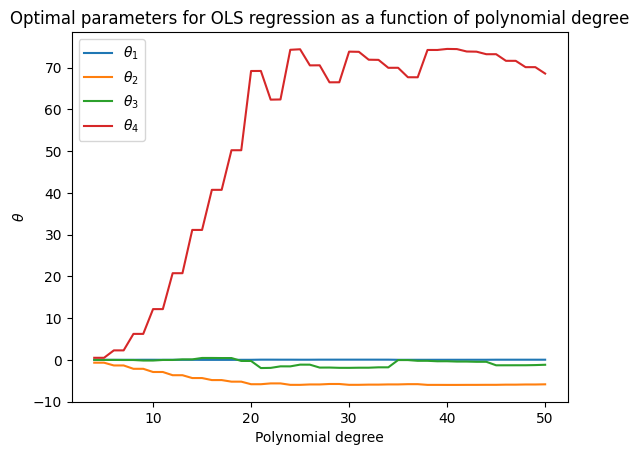

In [5]:
# Calculating and plotting optimal parameters as a function of polynomial degree.
polynomial_degrees = np.array(range(4, 51))
opt_theta_vals = np.zeros((len(polynomial_degrees),polynomial_degrees[0]))

for i in range(len(polynomial_degrees)): 
    X = PolynomialFeatures(polynomial_degrees[i], include_bias=False).fit_transform(x.reshape(-1, 1))
    theta,_ = opt_theta(X,y)
    opt_theta_vals[i,:] = theta[:polynomial_degrees[0]]

for i in range(opt_theta_vals.shape[1]): 
    plt.plot(polynomial_degrees,opt_theta_vals[:,i],label=fr"$\theta_{i+1}$")

plt.xlabel("Polynomial degree")
plt.ylabel(r"$\theta$")
plt.legend()
plt.title("Optimal parameters for OLS regression as a function of polynomial degree")
plt.show()


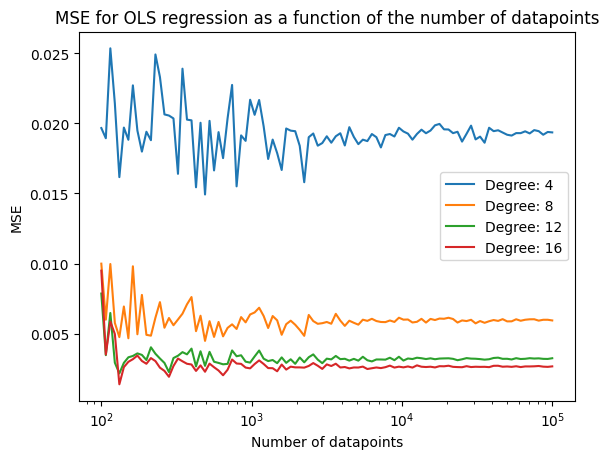

In [6]:
# Calculating and plotting mse as a function of the number of datapoints, for different polynomial degrees of polynomial fits.

theta_indices = np.array([2,3,4])
polynomial_degrees = np.array([4,8,12,16])
datapoints = 10**(np.linspace(2,5,101))
mse_vals = np.zeros((len(datapoints),len(polynomial_degrees)))

for i in range(len(datapoints)): 
    n = int(datapoints[i])
    x_n, y_n = generate_dataset(int(datapoints[i]))
    mse,_ = MSE_and_R2(x_n,y_n,polynomial_degrees)
    mse_vals[i,:] = mse

for i in range(len(polynomial_degrees)): 
    plt.plot(datapoints,mse_vals[:,i],label=f"Degree: {polynomial_degrees[i]}")

plt.xscale("log")
plt.xlabel("Number of datapoints")
plt.ylabel("MSE")
plt.title("MSE for OLS regression as a function of the number of datapoints")
plt.legend()
plt.show()

### Exercise 1b) 

We now attempt the Ridge regression model. We use different values of lambda, and plot the MSE and R2 as a function of polynomial degree. 

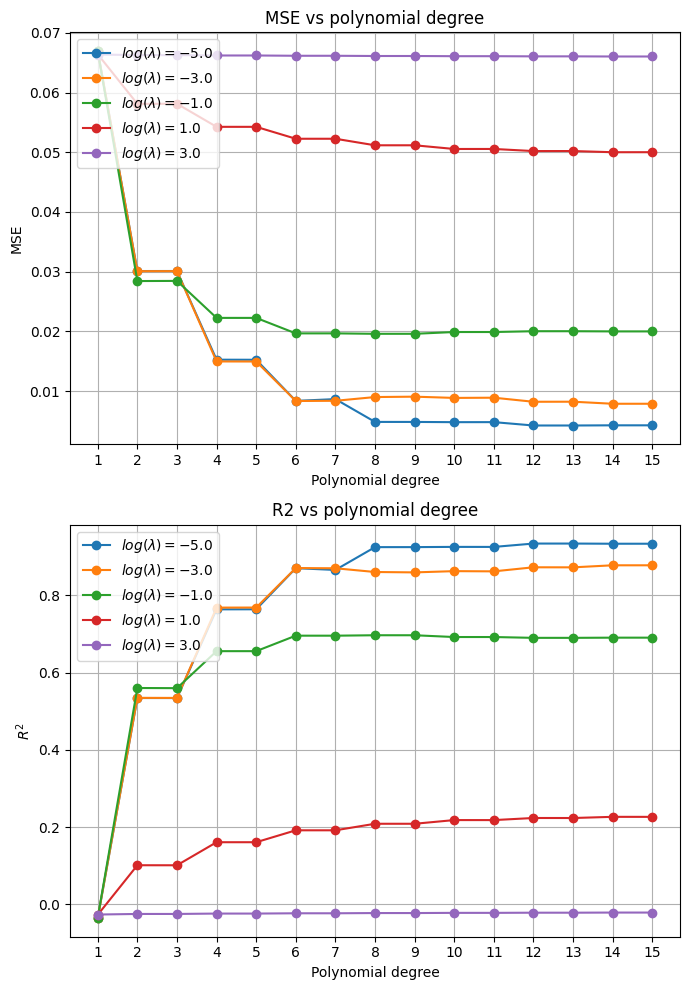

In [7]:
# Plot MSE as a function of polynomial degree, for lambda between 10^(-5) and 10^5

lamb = 10**(np.linspace(-5,3,5))

polynomial_degrees = np.array(range(1, 16))

plt.figure(figsize=(7,10))

for i in range(len(lamb)): 
    mse_values,r2_values = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    plt.subplot(2, 1, 1)
    plt.plot(polynomial_degrees, mse_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")
    
    plt.subplot(2, 1, 2)
    plt.plot(polynomial_degrees, r2_values, marker='o',label=fr"$log(\lambda) = {np.log10(lamb[i])}$")

    
plt.subplot(2, 1, 1)
plt.title('MSE vs polynomial degree')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend(loc = "upper left")
plt.xticks(polynomial_degrees)
plt.grid()

plt.subplot(2, 1, 2)
plt.title('R2 vs polynomial degree')
plt.xlabel('Polynomial degree')
plt.ylabel(r'$R^2$')
plt.legend(loc = "upper left")
plt.xticks(polynomial_degrees)
plt.grid()

plt.tight_layout()
plt.show()

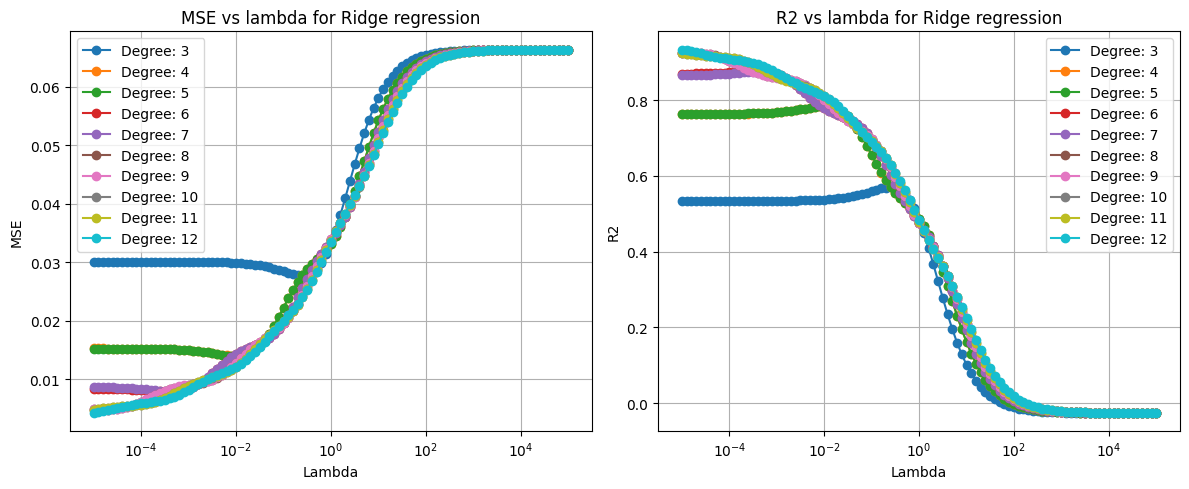

In [8]:
# Plot MSE as a function of lambda for different polynomial degrees

lamb = 10**(np.linspace(-5,5,101))

polynomial_degrees = np.array((range(3, 12+1)))

mse_values = np.zeros((len(polynomial_degrees),len(lamb)))
r2_values = mse_values.copy()

for i in range(len(lamb)): 
    mse,r2 = MSE_and_R2(x,y,polynomial_degrees,regression_type="Ridge",lamb = lamb[i])
    mse_values[:,i] = mse
    r2_values[:,i] = r2

plt.figure(figsize=(12,5))

for j in range(len(polynomial_degrees)): 
    plt.subplot(1, 2, 1)
    plt.plot(lamb, mse_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")

    plt.subplot(1, 2, 2)
    plt.plot(lamb, r2_values[j,:], marker='o',label=f"Degree: {polynomial_degrees[j]}")

plt.subplot(1, 2, 1)
plt.xscale('log')
plt.title('MSE vs lambda for Ridge regression')
plt.xlabel('Lambda')
plt.legend()
plt.ylabel('MSE')
plt.grid()

plt.subplot(1, 2, 2)
plt.xscale('log')
plt.title('R2 vs lambda for Ridge regression')
plt.xlabel('Lambda')
plt.legend()
plt.ylabel('R2')
plt.grid()

plt.tight_layout()
plt.show()

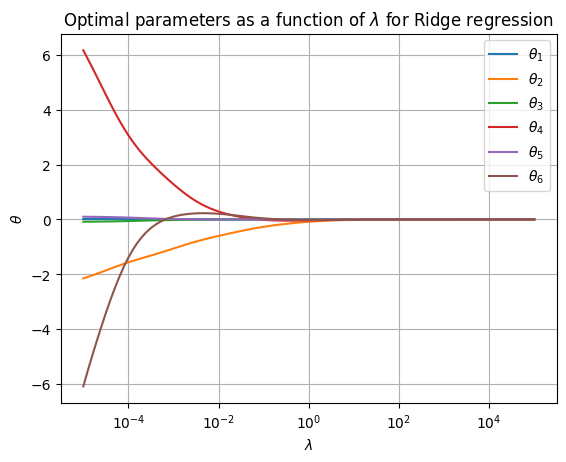

In [9]:
# Plotting optimal parameters as a function of lambda

lamb = 10**(np.linspace(-5,5,101))

theta_indices = np.array(range(1,7))

opt_theta_vals = np.zeros((len(lamb),len(theta_indices)))

X = PolynomialFeatures(15, include_bias=False).fit_transform(x.reshape(-1, 1))

for i in range(len(lamb)): 
    theta,_ = opt_theta(X,y,regression_type = "Ridge",lamb = lamb[i])
    opt_theta_vals[i,:] = theta[theta_indices - 1]

for j in range(len(theta_indices)): 
    plt.plot(lamb, opt_theta_vals[:,j], label=fr"$\theta_{theta_indices[j]}$")

plt.xscale("log")
plt.title('Optimal parameters as a function of $\\lambda$ for Ridge regression')
plt.xlabel("$\\lambda$")
plt.legend()
plt.ylabel("$\\theta$")
plt.grid()

plt.show()

In [10]:
# Values of MSE and R2 for a large number of datapoints (10^6), for different values of lambda
deg = 15
lamb = 10**(np.linspace(-5,5,11))



theta_indices = np.array([4])

np.random.seed(124)
n = 1e6
x_, y_ = generate_dataset(int(n))

for i in range(len(lamb)): 
    mse,r2 = MSE_and_R2(x_,y_,np.array([deg]),regression_type = "Ridge",lamb = lamb[i])
    print("MSE value for log(lambda) = " + str(np.log10(lamb[i])) + ": " + str(mse[0]))
    print("R2 value for log(lambda) = " + str(np.log10(lamb[i])) + ": " + str(r2[0]))
    print("")
    print("")


MSE value for log(lambda) = -5.0: 0.00530985254881685
R2 value for log(lambda) = -5.0: 0.9363277570983981


MSE value for log(lambda) = -4.0: 0.0077400193520601405
R2 value for log(lambda) = -4.0: 0.9071868026999574


MSE value for log(lambda) = -3.0: 0.011283106125628143
R2 value for log(lambda) = -3.0: 0.8647004474586348


MSE value for log(lambda) = -2.0: 0.01840088425569389
R2 value for log(lambda) = -2.0: 0.7793487557024787


MSE value for log(lambda) = -1.0: 0.03108652065888483
R2 value for log(lambda) = -1.0: 0.6272309868945003


MSE value for log(lambda) = 0.0: 0.05021265152453348
R2 value for log(lambda) = 0.0: 0.39788306450882904


MSE value for log(lambda) = 1.0: 0.06967670737507685
R2 value for log(lambda) = 1.0: 0.1644829690123374


MSE value for log(lambda) = 2.0: 0.08102554046840205
R2 value for log(lambda) = 2.0: 0.028395262108131147


MSE value for log(lambda) = 3.0: 0.08313837108088733
R2 value for log(lambda) = 3.0: 0.003059593606737687


MSE value for log(lambda) = 